In [1]:

# Step 0 - Import libraries


# Here I import pandas to work with tabular data (dataframes)
import pandas as pd

# Here I import numpy for numerical operations
import numpy as np

# Here I import matplotlib and seaborn for plots and data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Here I import tools from scikit-learn for preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay


In [2]:

# Step 1 - Load the dataset


# Here I set the path to the CSV file
data_path = "creditcard.csv"

# Here I read the CSV file into a pandas DataFrame
df = pd.read_csv(data_path)

# Here I display the first 5 rows to see the structure of the data
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:

# Step 2 - Descriptive analysis of the data




# 2.1 Basic information


# Here I show general information about the dataframe
# to see number of rows, columns and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Here I calculate basic statistics for the numerical variables
# to see mean, std, min, max, etc.
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:

# 2.2 Check for missing values


# Here I check how many missing values there are in each column
missing_values = df.isnull().sum()

# Here I print the number of missing values per column
print("Missing values per column:")
print(missing_values)


Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:

# 2.3 Class distribution (fraud vs non-fraud)


# Here I check the distribution of the target variable "Class"
# 0 = normal transaction, 1 = fraud
class_counts = df["Class"].value_counts()

# Here I print the counts for each class
print("\nClass distribution:")
print(class_counts)

# Here I calculate the percentage of frauds
fraud_percentage = class_counts[1] / class_counts.sum() * 100

# Here I print the fraud percentage
print(f"\nFraud percentage: {fraud_percentage:.4f}%")



Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Fraud percentage: 0.1727%


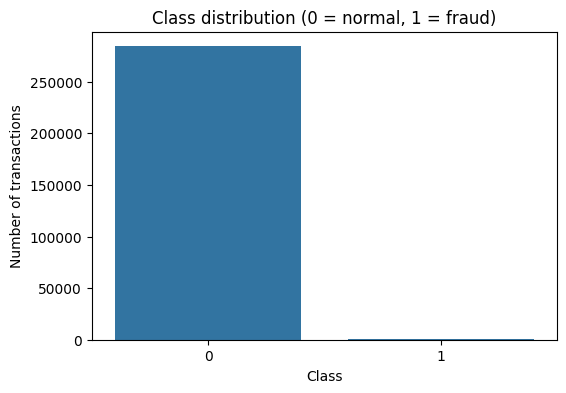

In [7]:
# Here I make a bar plot of the class distribution
plt.figure(figsize=(6,4))  # Here I set the size of the figure
# Here I create a bar plot for the counts of each class
sns.barplot(x=class_counts.index, y=class_counts.values)
# Here I set a title for the plot
plt.title("Class distribution (0 = normal, 1 = fraud)")
# Here I set the label for the x axis
plt.xlabel("Class")
# Here I set the label for the y axis
plt.ylabel("Number of transactions")
# Here I show the plot
plt.show()


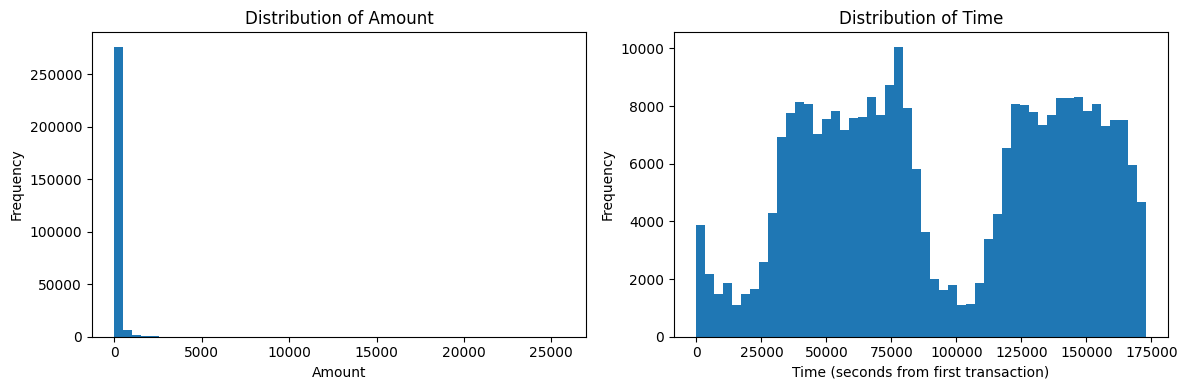

In [8]:

# 2.4 Distribution of 'Amount' and 'Time'


# Here I create a figure with two subplots to show histograms
plt.figure(figsize=(12,4))  # Here I set the global figure size

# Here I create the first subplot for the 'Amount' feature
plt.subplot(1,2,1)
# Here I plot the histogram of the transaction amounts
plt.hist(df["Amount"], bins=50)
# Here I set the title of the histogram
plt.title("Distribution of Amount")
# Here I label the x axis
plt.xlabel("Amount")
# Here I label the y axis
plt.ylabel("Frequency")

# Here I create the second subplot for the 'Time' feature
plt.subplot(1,2,2)
# Here I plot the histogram of the transaction times
plt.hist(df["Time"], bins=50)
# Here I set the title of the histogram
plt.title("Distribution of Time")
# Here I label the x axis
plt.xlabel("Time (seconds from first transaction)")
# Here I label the y axis
plt.ylabel("Frequency")

# Here I adjust the layout so that plots do not overlap
plt.tight_layout()
# Here I show the plots
plt.show()


In [10]:

# Step 3 - Preprocessing
# (Part 2 of the assignment)


# In this dataset most features V1..V28 are already scaled (PCA components),
# but 'Time' and 'Amount' are not scaled.
# We will:
#   - separate features and target
#   - scale 'Time' and 'Amount'
#   - keep other features as they are
#   - split dataset into train and test sets


# 3.1 Separate features and target


# Here I define the name of the target column
target_column = "Class"

# Here I create X with all columns except the target
X = df.drop(columns=[target_column])

# Here I create y with only the target column
y = df[target_column]


In [11]:

# 3.2 Train-test split


# Here I split the data into training and test sets
# test_size=0.2 means 20% of data for test
# random_state is fixed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Here I use stratify to keep same class distribution in train and test
)

# Here I print the shapes of the splits to check the dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (227845, 30)
X_test shape: (56962, 30)
y_train shape: (227845,)
y_test shape: (56962,)


In [12]:

# 3.3 standardize Scale 'Time' and 'Amount'


# Here I create a copy of X_train to avoid modifying original data
X_train_processed = X_train.copy()
# Here I create a copy of X_test for the same reason
X_test_processed = X_test.copy()

# Here I define the columns that I want to scale
columns_to_scale = ["Time", "Amount"]

# Here I create a StandardScaler object
scaler = StandardScaler()

# Here I fit the scaler only on training data to avoid data leakage
scaler.fit(X_train_processed[columns_to_scale])

# Here I transform the training data for the selected columns
X_train_processed[columns_to_scale] = scaler.transform(X_train_processed[columns_to_scale])

# Here I transform the test data with the same scaler (no fit here)
X_test_processed[columns_to_scale] = scaler.transform(X_test_processed[columns_to_scale])

# Here I show the first rows of the processed training data to check the result
X_train_processed.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.411588,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.322494
180305,0.623141,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.339764
42664,-1.130680,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,0.346693
198723,0.794699,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.327360
82325,-0.748102,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,-0.008281


In [13]:

# Step 4 - Problem formalisation



# - Input (X): transaction features (Time, Amount, V1..V28)
# - Output (y): binary variable "Class" (0 = normal, 1 = fraud)
# - Task type: supervised binary classification
# - Goal: predict if a new transaction is fraudulent or not
# - Performance metrics: we care about recall for fraud class,
#   precision, F1-score, and ROC-AUC because the classes are very imbalanced.



In [14]:

# Step 5 - Baseline model: Logistic Regression



# For a baseline model, I choose Logistic Regression because:
# - It is a simple linear model
# - It is fast to train
# - It gives probabilities for the positive class
# - It is a common baseline for binary classification

# 5.1 Create and train the model


# Here I create the Logistic Regression model
# I use class_weight='balanced' to give more weight to the minority class (fraud)
baseline_model = LogisticRegression(
    class_weight='balanced',  # Here I balance classes because dataset is highly imbalanced
    max_iter=1000,            # Here I increase max_iter to be sure the model converges
    n_jobs=-1                 # Here I use all CPU cores if possible
)

# Here I fit the model on the processed training data
baseline_model.fit(X_train_processed, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [15]:

# 5.2 Evaluate the model


# Here I use the model to predict labels for the test set
y_pred = baseline_model.predict(X_test_processed)

# Here I also get the predicted probabilities for the positive class (fraud = 1)
y_proba = baseline_model.predict_proba(X_test_processed)[:, 1]

# Here I print a text classification report with precision, recall, F1-score
print("Classification report (baseline logistic regression):")
print(classification_report(y_test, y_pred, digits=4))


Classification report (baseline logistic regression):
              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0610    0.9184    0.1144        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5510     56962
weighted avg     0.9982    0.9755    0.9861     56962



Confusion matrix:
[[55478  1386]
 [    8    90]]


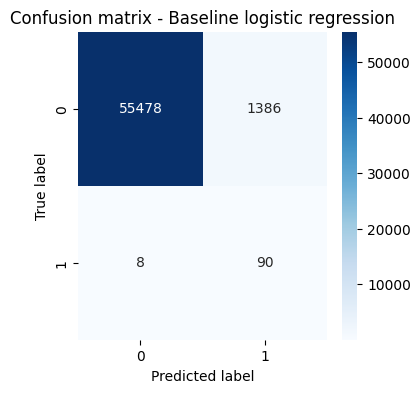

In [16]:
# Here I compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Here I print the confusion matrix values
print("Confusion matrix:")
print(cm)

# Here I plot the confusion matrix as a heatmap for better visualization
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix - Baseline logistic regression")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


In [ ]:
# Here I calculate the ROC-AUC score, which is good for imbalanced datasets
roc_auc = roc_auc_score(y_test, y_proba)

# Here I print the ROC-AUC score
print(f"ROC-AUC score: {roc_auc:.4f}")

#probabilité que le modèle donne une probabilité plus élevée à une fraude qu’à une transaction normale choisie au hasard.


In [ ]:
# Here I plot the ROC curve to visualize the trade-off between TPR and FPR
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC curve - Baseline logistic regression")
plt.show()


In [19]:

# PART II - Project
# Grid Search + Ensemble Learning on creditcard fraud dataset


# Here I import the extra libraries needed for Part II
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay,
    f1_score
)




In [20]:

# Step 1 - Grid Search on baseline Logistic Regression


# Here I define the parameter grid for Logistic Regression
# I choose some values for C (regularization strength)
# and I test with and without class_weight='balanced'
param_grid_logreg = {
    "C": [0.01, 0.1, 1.0, 10.0],           # Here I test different levels of regularization
    "class_weight": [None, "balanced"],    # Here I test if balancing classes helps
    "solver": ["lbfgs"],                   # Here I fix solver to lbfgs (good default)
    "penalty": ["l2"]                      # Here I use L2 penalty (standard choice)
}

# Here I create a new Logistic Regression model (baseline family)
logreg_base = LogisticRegression(
    max_iter=1000,      # Here I increase max_iter to make sure optimization converges
    n_jobs=-1           # Here I use all CPU cores available
)

# Here I define the scoring metric for grid search
# Because the dataset is imbalanced, I prefer ROC-AUC instead of accuracy
scoring_metric = "roc_auc"

# Here I create the GridSearchCV object for Logistic Regression
grid_logreg = GridSearchCV(
    estimator=logreg_base,        # Here I use the baseline Logistic Regression as estimator
    param_grid=param_grid_logreg, # Here I pass the parameter grid defined above
    scoring=scoring_metric,       # Here I use ROC-AUC as evaluation metric
    cv=3,                         # Here I use 3-fold cross-validation
    n_jobs=-1,                    # Here I use all CPU cores to speed up computation
    verbose=2                     # Here I increase verbosity to see progress in the console
)

# Here I fit the grid search on the training data
grid_logreg.fit(X_train_processed, y_train)

# Here I print the best hyperparameters found by grid search
print("Best parameters for Logistic Regression:")
print(grid_logreg.best_params_)

# Here I print the best cross-validation score obtained
print(f"Best CV ROC-AUC for Logistic Regression: {grid_logreg.best_score_:.4f}")


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for Logistic Regression:
{'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV ROC-AUC for Logistic Regression: 0.9831


In [21]:
# Here I extract the best Logistic Regression model from the grid search
best_logreg = grid_logreg.best_estimator_

# Here I use the best model to predict labels on the test set
y_pred_logreg = best_logreg.predict(X_test_processed)

# Here I get predicted probabilities for the positive class (fraud = 1)
y_proba_logreg = best_logreg.predict_proba(X_test_processed)[:, 1]

# Here I print the classification report for the tuned Logistic Regression
print("Classification report - Tuned Logistic Regression:")
print(classification_report(y_test, y_pred_logreg, digits=4))

# Here I compute the confusion matrix for the tuned Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Here I print the confusion matrix values
print("Confusion matrix - Tuned Logistic Regression:")
print(cm_logreg)

# Here I compute ROC-AUC on the test set
roc_auc_logreg = roc_auc_score(y_test, y_proba_logreg)
print(f"Test ROC-AUC - Tuned Logistic Regression: {roc_auc_logreg:.4f}")


Classification report - Tuned Logistic Regression:
              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     56864
           1     0.8219    0.6122    0.7018        98

    accuracy                         0.9991     56962
   macro avg     0.9106    0.8060    0.8507     56962
weighted avg     0.9990    0.9991    0.9990     56962

Confusion matrix - Tuned Logistic Regression:
[[56851    13]
 [   38    60]]
Test ROC-AUC - Tuned Logistic Regression: 0.9721


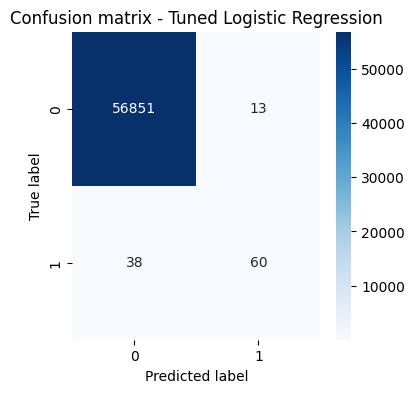

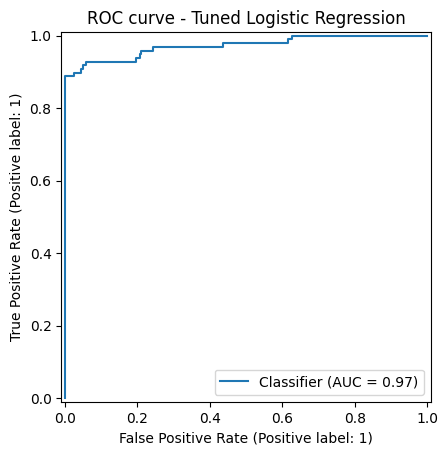

In [22]:
# Here I plot the confusion matrix for the tuned Logistic Regression
plt.figure(figsize=(4,4))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix - Tuned Logistic Regression")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Here I plot the ROC curve for the tuned Logistic Regression
RocCurveDisplay.from_predictions(y_test, y_proba_logreg)
plt.title("ROC curve - Tuned Logistic Regression")
plt.show()


In [24]:

# Step 2 - Grid Search on Decision Tree


# Here I define a lighter parameter grid for the Decision Tree
# I reduce the number of tested values to make the grid search faster
param_grid_tree = {
    # Here I fix criterion to "gini" to simplify the search
    "max_depth": [4, 6, 8],           # Here I test only 3 reasonable depths
    "min_samples_split": [2, 5],      # Here I test 2 values for min_samples_split
    "min_samples_leaf": [1, 2],       # Here I test 2 values for min_samples_leaf
    "class_weight": ["balanced"]      # Here I force class_weight to "balanced"
}

# Here I create a base Decision Tree model with gini criterion
tree_base = DecisionTreeClassifier(
    criterion="gini",        # Here I use gini as a standard choice
    random_state=42          # Here I fix random_state for reproducibility
)

# Here I create the GridSearchCV object for the Decision Tree
grid_tree = GridSearchCV(
    estimator=tree_base,         # Here I use the base Decision Tree as estimator
    param_grid=param_grid_tree,  # Here I pass the lighter parameter grid
    scoring=scoring_metric,      # Here I keep ROC-AUC as metric
    cv=3,                        # Here I use 3-fold cross-validation
    n_jobs=-1,                   # Here I use all CPU cores
    verbose=2                    # Here I display progress in the console
)

# Here I fit the grid search for the Decision Tree on the training data
grid_tree.fit(X_train_processed, y_train)

# Here I print the best hyperparameters for the Decision Tree
print("Best parameters for Decision Tree (light grid):")
print(grid_tree.best_params_)

# Here I print the best CV ROC-AUC for the Decision Tree
print(f"Best CV ROC-AUC for Decision Tree (light grid): {grid_tree.best_score_:.4f}")



Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for Decision Tree (light grid):
{'class_weight': 'balanced', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV ROC-AUC for Decision Tree (light grid): 0.9239


In [25]:
# Here I extract the best Decision Tree model from grid search
best_tree = grid_tree.best_estimator_

# Here I use the best tree model to predict labels on the test set
y_pred_tree = best_tree.predict(X_test_processed)

# Here I get predicted probabilities for the positive class (fraud = 1)
y_proba_tree = best_tree.predict_proba(X_test_processed)[:, 1]

# Here I print the classification report for the tuned Decision Tree
print("Classification report - Tuned Decision Tree:")
print(classification_report(y_test, y_pred_tree, digits=4))

# Here I compute the confusion matrix for the tuned Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Here I print the confusion matrix
print("Confusion matrix - Tuned Decision Tree:")
print(cm_tree)

# Here I compute ROC-AUC for the tuned Decision Tree
roc_auc_tree = roc_auc_score(y_test, y_proba_tree)
print(f"Test ROC-AUC - Tuned Decision Tree: {roc_auc_tree:.4f}")


Classification report - Tuned Decision Tree:
              precision    recall  f1-score   support

           0     0.9998    0.9519    0.9752     56864
           1     0.0305    0.8776    0.0589        98

    accuracy                         0.9517     56962
   macro avg     0.5151    0.9147    0.5170     56962
weighted avg     0.9981    0.9517    0.9736     56962

Confusion matrix - Tuned Decision Tree:
[[54126  2738]
 [   12    86]]
Test ROC-AUC - Tuned Decision Tree: 0.9280


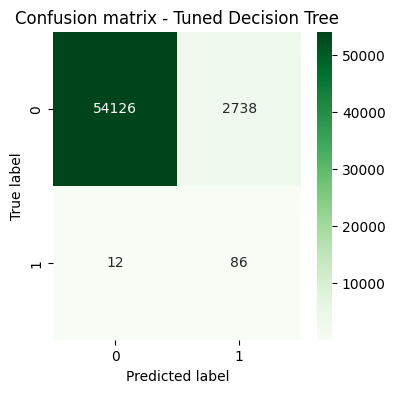

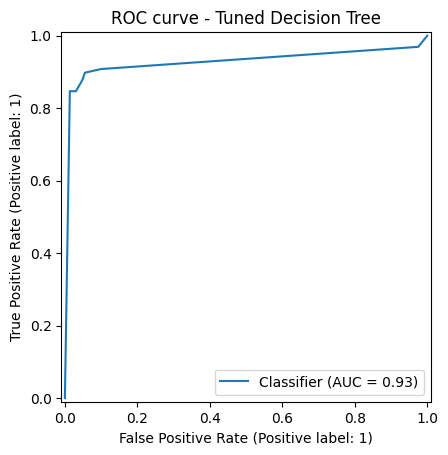

In [26]:
# Here I plot the confusion matrix for the tuned Decision Tree
plt.figure(figsize=(4,4))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion matrix - Tuned Decision Tree")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Here I plot the ROC curve for the tuned Decision Tree
RocCurveDisplay.from_predictions(y_test, y_proba_tree)
plt.title("ROC curve - Tuned Decision Tree")
plt.show()


In [27]:

# Step 3 - Compare tuned baseline models


# Here I create a dictionary to store evaluation metrics for each model
results_baseline = {}

# Here I compute F1-score for fraud class (1) for Logistic Regression
f1_logreg = f1_score(y_test, y_pred_logreg, pos_label=1)
# Here I store metrics for Logistic Regression in the results dictionary
results_baseline["Logistic Regression"] = {
    "ROC_AUC": roc_auc_logreg,
    "F1_fraud": f1_logreg
}

# Here I compute F1-score for fraud class (1) for Decision Tree
f1_tree = f1_score(y_test, y_pred_tree, pos_label=1)
# Here I store metrics for Decision Tree in the results dictionary
results_baseline["Decision Tree"] = {
    "ROC_AUC": roc_auc_tree,
    "F1_fraud": f1_tree
}

# Here I convert the dictionary to a pandas DataFrame for better display
baseline_df = pd.DataFrame(results_baseline).T

# Here I print the results table
print("Comparison of tuned baseline models:")
print(baseline_df)


Comparison of tuned baseline models:
                      ROC_AUC  F1_fraud
Logistic Regression  0.972146  0.701754
Decision Tree        0.928037  0.058864


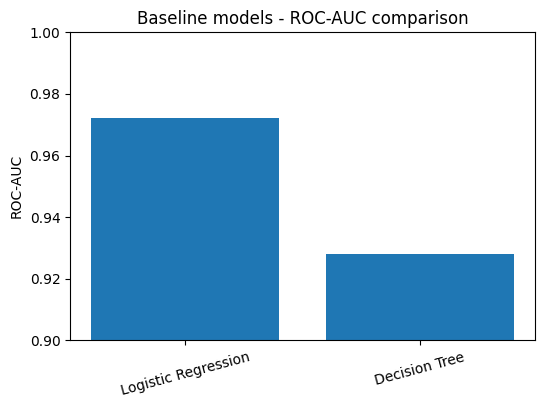

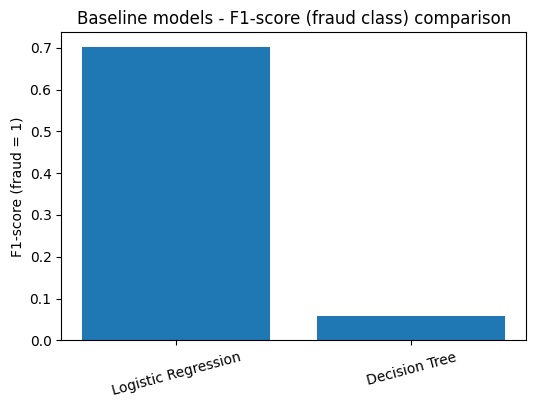

In [28]:
# Here I create a bar plot to compare ROC-AUC of the baseline models
plt.figure(figsize=(6,4))
# Here I use the index of the dataframe as x-axis labels
plt.bar(baseline_df.index, baseline_df["ROC_AUC"])
plt.title("Baseline models - ROC-AUC comparison")
plt.ylabel("ROC-AUC")
plt.xticks(rotation=15)
plt.ylim(0.9, 1.0)  # Here I set a reasonable y-limits (you can adapt)
plt.show()

# Here I create a second bar plot to compare F1-score on fraud class
plt.figure(figsize=(6,4))
plt.bar(baseline_df.index, baseline_df["F1_fraud"])
plt.title("Baseline models - F1-score (fraud class) comparison")
plt.ylabel("F1-score (fraud = 1)")
plt.xticks(rotation=15)
plt.show()


In [29]:

# Step 4 - Ensemble model: Bagging with Decision Tree


# Here I create a BaggingClassifier using the best Decision Tree as base estimator
bagging_tree = BaggingClassifier(
    estimator=best_tree,    # Here I reuse the tuned Decision Tree from grid search
    n_estimators=10,        # Here I set the number of trees in the ensemble
    max_samples=0.8,        # Here I use 80% of samples for each base estimator
    bootstrap=True,         # Here I use sampling with replacement
    n_jobs=-1,              # Here I use all CPU cores
    random_state=42         # Here I fix random_state for reproducibility
)

# Here I fit the Bagging model on the training data
bagging_tree.fit(X_train_processed, y_train)

# Here I predict labels on the test data using the Bagging model
y_pred_bagging = bagging_tree.predict(X_test_processed)

# Here I get predicted probabilities for the positive class (fraud = 1)
y_proba_bagging = bagging_tree.predict_proba(X_test_processed)[:, 1]

# Here I print the classification report for the Bagging Decision Tree
print("Classification report - Bagging (Decision Tree):")
print(classification_report(y_test, y_pred_bagging, digits=4))

# Here I compute the confusion matrix for the Bagging model
cm_bagging = confusion_matrix(y_test, y_pred_bagging)

# Here I print the confusion matrix
print("Confusion matrix - Bagging (Decision Tree):")
print(cm_bagging)

# Here I compute ROC-AUC for the Bagging model
roc_auc_bagging = roc_auc_score(y_test, y_proba_bagging)
print(f"Test ROC-AUC - Bagging (Decision Tree): {roc_auc_bagging:.4f}")


Classification report - Bagging (Decision Tree):
              precision    recall  f1-score   support

           0     0.9997    0.9889    0.9943     56864
           1     0.1161    0.8469    0.2042        98

    accuracy                         0.9886     56962
   macro avg     0.5579    0.9179    0.5992     56962
weighted avg     0.9982    0.9886    0.9929     56962

Confusion matrix - Bagging (Decision Tree):
[[56232   632]
 [   15    83]]
Test ROC-AUC - Bagging (Decision Tree): 0.9711


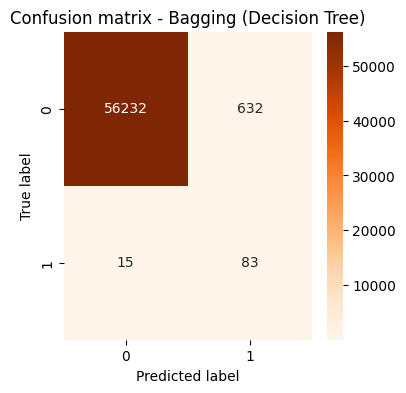

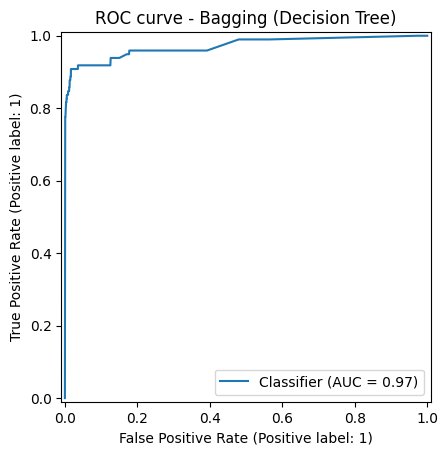

In [30]:
# Here I plot the confusion matrix for the Bagging model
plt.figure(figsize=(4,4))
sns.heatmap(cm_bagging, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion matrix - Bagging (Decision Tree)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Here I plot the ROC curve for the Bagging model
RocCurveDisplay.from_predictions(y_test, y_proba_bagging)
plt.title("ROC curve - Bagging (Decision Tree)")
plt.show()


In [31]:

# Step 5 - Ensemble model: VotingClassifier (soft voting)


# Here I create a soft voting ensemble that combines:
# - the best Logistic Regression
# - the best Decision Tree
voting_clf = VotingClassifier(
    estimators=[
        ("logreg", best_logreg),  # Here I add the tuned Logistic Regression
        ("tree", best_tree)       # Here I add the tuned Decision Tree
    ],
    voting="soft",                # Here I use soft voting (average of probabilities)
    n_jobs=-1                     # Here I use all CPU cores if possible
)

# Here I fit the VotingClassifier on the training data
voting_clf.fit(X_train_processed, y_train)

# Here I predict labels on the test set using the VotingClassifier
y_pred_voting = voting_clf.predict(X_test_processed)

# Here I get predicted probabilities for the positive class (fraud = 1)
# For soft voting, predict_proba is available
y_proba_voting = voting_clf.predict_proba(X_test_processed)[:, 1]

# Here I print the classification report for the Voting ensemble
print("Classification report - Voting (LogReg + Tree):")
print(classification_report(y_test, y_pred_voting, digits=4))

# Here I compute the confusion matrix for the Voting ensemble
cm_voting = confusion_matrix(y_test, y_pred_voting)

# Here I print the confusion matrix
print("Confusion matrix - Voting (LogReg + Tree):")
print(cm_voting)

# Here I compute ROC-AUC for the Voting ensemble
roc_auc_voting = roc_auc_score(y_test, y_proba_voting)
print(f"Test ROC-AUC - Voting (LogReg + Tree): {roc_auc_voting:.4f}")


Classification report - Voting (LogReg + Tree):
              precision    recall  f1-score   support

           0     0.9997    0.9989    0.9993     56864
           1     0.5724    0.8469    0.6831        98

    accuracy                         0.9986     56962
   macro avg     0.7861    0.9229    0.8412     56962
weighted avg     0.9990    0.9986    0.9988     56962

Confusion matrix - Voting (LogReg + Tree):
[[56802    62]
 [   15    83]]
Test ROC-AUC - Voting (LogReg + Tree): 0.9714


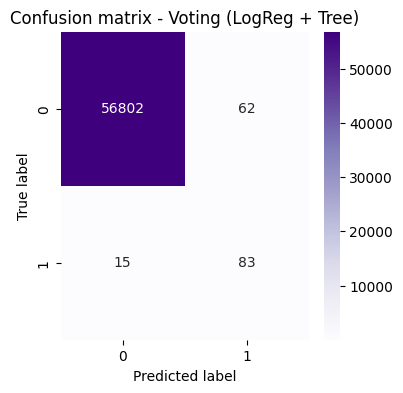

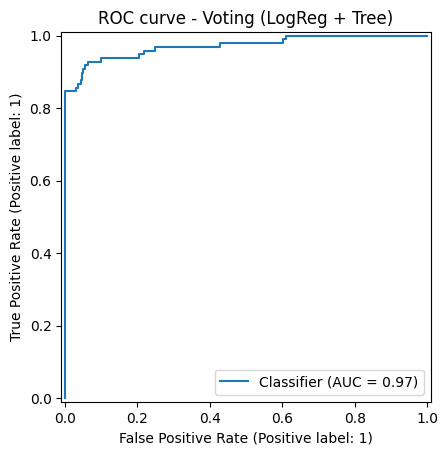

In [32]:
# Here I plot the confusion matrix for the Voting ensemble
plt.figure(figsize=(4,4))
sns.heatmap(cm_voting, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion matrix - Voting (LogReg + Tree)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Here I plot the ROC curve for the Voting ensemble
RocCurveDisplay.from_predictions(y_test, y_proba_voting)
plt.title("ROC curve - Voting (LogReg + Tree)")
plt.show()


In [33]:

# Step 6 - Global comparison of all models


# Here I create a dictionary to store metrics for all models
results_all = {}

# Here I store metrics for the tuned Logistic Regression
results_all["Logistic Regression (GS)"] = {
    "ROC_AUC": roc_auc_logreg,
    "F1_fraud": f1_score(y_test, y_pred_logreg, pos_label=1)
}

# Here I store metrics for the tuned Decision Tree
results_all["Decision Tree (GS)"] = {
    "ROC_AUC": roc_auc_tree,
    "F1_fraud": f1_score(y_test, y_pred_tree, pos_label=1)
}

# Here I store metrics for the Bagging model
results_all["Bagging (Tree)"] = {
    "ROC_AUC": roc_auc_bagging,
    "F1_fraud": f1_score(y_test, y_pred_bagging, pos_label=1)
}

# Here I store metrics for the Voting ensemble
results_all["Voting (LogReg + Tree)"] = {
    "ROC_AUC": roc_auc_voting,
    "F1_fraud": f1_score(y_test, y_pred_voting, pos_label=1)
}

# Here I convert the dictionary to a DataFrame
results_all_df = pd.DataFrame(results_all).T

# Here I print the global comparison table
print("Global comparison of all models:")
print(results_all_df)


Global comparison of all models:
                           ROC_AUC  F1_fraud
Logistic Regression (GS)  0.972146  0.701754
Decision Tree (GS)        0.928037  0.058864
Bagging (Tree)            0.971123  0.204182
Voting (LogReg + Tree)    0.971359  0.683128


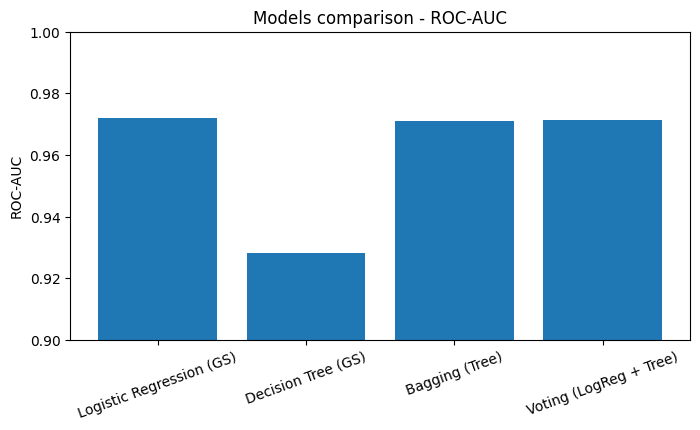

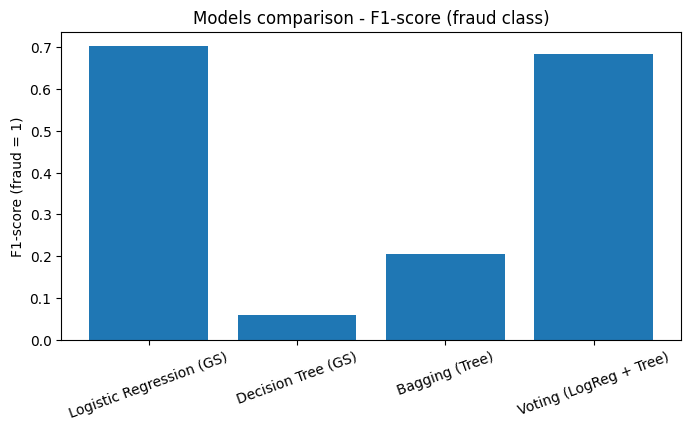

In [34]:
# Here I create a bar plot to compare ROC-AUC for all models
plt.figure(figsize=(8,4))
plt.bar(results_all_df.index, results_all_df["ROC_AUC"])
plt.title("Models comparison - ROC-AUC")
plt.ylabel("ROC-AUC")
plt.xticks(rotation=20)
plt.ylim(0.9, 1.0)  # You can adapt limits depending on your scores
plt.show()

# Here I create another bar plot for F1-score on fraud class (1)
plt.figure(figsize=(8,4))
plt.bar(results_all_df.index, results_all_df["F1_fraud"])
plt.title("Models comparison - F1-score (fraud class)")
plt.ylabel("F1-score (fraud = 1)")
plt.xticks(rotation=20)
plt.show()
